# Modeling

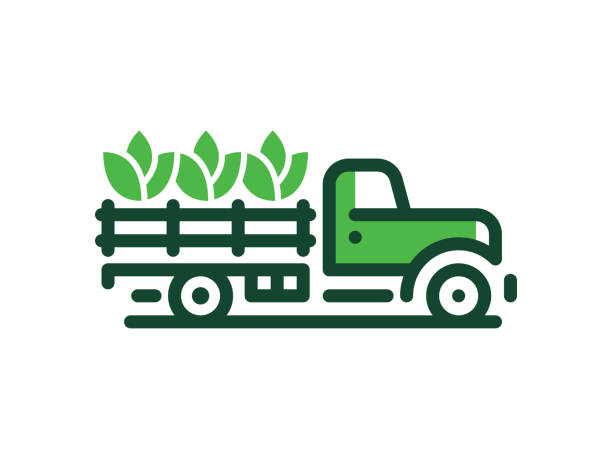

# Overview

The Instacart dataset contains historical order information, including product details, user behavior, and order characteristics. My goal is to use a predictive model to analyze which features influence a customer's likelihood to reorder organic products. By examining the model's coefficients, I can gain insights into which features have the most significant impact on the prediction.

## Findings & Recommendations

By implementing these recommendations, GreenGrocer can enhance customer satisfaction, increase customer retention, and drive higher reorder rates, ultimately leading to improved business performance and growth.

1. **Promote Organic Produce:**
    - Customers who previously ordered organic products are approximately 1.33 times more likely to reorder organic products in their upcoming order.
    - Targeted marketing campaigns on organic products
    - Highlight the benefits of organic items to attract and retain customers

2. **Encourage Frequent Purchases:**
    - Implement Loyalty programs & Subscription options
    - Personalize recommendations based on purchase history/frequent purchases

3. **Leverage Basket Size:**
    - Implement strategies to encourage customers to add more items to carts
    - Bundle related products
    - Special deals for bulk purchases

4. **Enhance Product Placement:**
    - Products added later to the cart have a lower chance of being reordered. Explore ways to streamline the add-to-cart process and ensure that customers find what they need quickly
    - Optimize the user interface for easier shopping
    - Implement "quick add" or one-click reordering features

## Data Preperation

In [1]:
#imports
import pandas as pd
import numpy as np
import scipy
import os
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in files
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')

In [3]:
dataframes = ['orders', 'order_products_prior', 'products']

for df_name in dataframes:
    df = globals()[df_name]
    print(f"DataFrame: {df_name}")
    print("Number of rows:", len(df))
    display(df.head())
    print("Info:")
    display(df.info())
    print("Describe:")
    display(df.describe())
    print("=" * 40)

DataFrame: orders
Number of rows: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


None

Describe:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


DataFrame: order_products_prior
Number of rows: 24638782


,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24638782 entries, 0 to 24638781
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         float64
 2   add_to_cart_order  float64
 3   reordered          float64
dtypes: float64(3), int64(1)
memory usage: 751.9 MB


None

Describe:


,order_id,product_id,add_to_cart_order,reordered
count,2.463878e+07,2.463878e+07,2.463878e+07,2.463878e+07
mean,1.299780e+06,2.557558e+04,8.353810e+00,5.898118e-01
std,7.500833e+05,1.409755e+04,7.128774e+00,4.918677e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,6.501430e+05,1.352400e+04,3.000000e+00,0.000000e+00
50%,1.300340e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,1.949210e+06,3.793600e+04,1.100000e+01,1.000000e+00
max,2.598514e+06,4.968800e+04,1.450000e+02,1.000000e+00


DataFrame: products
Number of rows: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

Describe:


,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [4]:
#capping the days since to 29 to avoid outliers
orders = orders.loc[orders['days_since_prior_order'] <= 29]

In [5]:
#creating a column of if a product is organic or not
products['organic'] = products['product_name'].str.lower().str.contains('organic').astype(int)

In [6]:
#creating an organic produce column
products['organic_produce'] = np.where((products['organic'] == 1) & (products['department_id'] == 4), 1, 0)

In [7]:
#merging files together
df = products.merge(order_products_prior,on='product_id', how='inner')
df = pd.merge(df, orders, on='order_id', how='inner')

In [8]:
#creating an organic dataframe and dropping unused and categorical columns for modeling
organic_mod= df.loc[df['organic'] == 1]
organic_mod = organic_mod.drop(['organic','product_name','eval_set'], axis=1)

## Feature Engineering

The features used to build our models are:

- Order_id
- Order_number
- Average_days_between_orders
- Basket_size
- Aisle
- Department
- Product
- User_id
- Order_hour_of_day
- Order_dow(day of week)
- Average Product Position in cart
- Average days since a product was ordered

In [9]:
#Adding column average days between a users orders using days_since_prior_order
organic_mod['avg_days_btn_orders'] = organic_mod.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
organic_mod['avg_days_btn_orders'] = organic_mod['avg_days_btn_orders'].replace(np.nan, 1)

In [10]:
#adding a column 'basket_size' for the number of products in each order
organic_mod['basket_size'] = organic_mod.groupby('order_id')['product_id'].transform('count')

In [11]:
#adding a column 'avg_prod_cart_position' for the average placement of a product in a user cart
organic_mod['avg_prod_position'] = organic_mod.groupby('product_id')['add_to_cart_order'].transform('mean')

In [12]:
#adding a column for the average days since a product was ordered
organic_mod['avg_days_since_last_order_product'] = organic_mod.groupby('product_id')['days_since_prior_order'].transform('mean')

Checking for any missing data before splitting the data

In [13]:
# Calculate the percentage of missing values in each column
missing_percentage = (organic_mod.isnull().sum() / len(organic_mod)) * 100
# Create a new DataFrame to store the missing percentage for each column
missing_data = pd.DataFrame({'Column': organic_mod.columns, 'MissingPercentage': missing_percentage})
# Print the missing percentage for each column
missing_data

,Column,MissingPercentage
product_id,product_id,0.0
aisle_id,aisle_id,0.0
department_id,department_id,0.0
organic_produce,organic_produce,0.0
order_id,order_id,0.0
add_to_cart_order,add_to_cart_order,0.0
reordered,reordered,0.0
user_id,user_id,0.0
order_number,order_number,0.0
order_dow,order_dow,0.0


There no missing values and all columns are numeric

In [14]:
#checking final features
organic_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676357 entries, 7 to 20736470
Data columns (total 16 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   product_id                         int64  
 1   aisle_id                           int64  
 2   department_id                      int64  
 3   organic_produce                    int64  
 4   order_id                           int64  
 5   add_to_cart_order                  float64
 6   reordered                          float64
 7   user_id                            int64  
 8   order_number                       int64  
 9   order_dow                          int64  
 10  order_hour_of_day                  int64  
 11  days_since_prior_order             float64
 12  avg_days_btn_orders                float32
 13  basket_size                        int64  
 14  avg_prod_position                  float64
 15  avg_days_since_last_order_product  float64
dtypes: float32(1), fl

** **
# Modeling

### Train Test Split

I am using reordered as my target variable and have 15 features

In [15]:
#checking class balance
organic_mod['reordered'].value_counts(normalize=True)

1.0    0.693002
0.0    0.306998
Name: reordered, dtype: float64

In [16]:
# Separate features and target
X = organic_mod.drop('reordered', axis=1) #data
y = organic_mod['reordered'] #target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

For my models I will be using The F1-score metric because it is a weighted average of precision and recall. It is a good measure of overall performance, especially when the classes are imbalanced such as mine

** **
## Decision Tree Classifier (Baseline)

In [17]:
#instantiate a DecisionTreeClassifier
tree_model_base = DecisionTreeClassifier(random_state=42)

#fit the model on the train data
tree_model_base.fit(X_train, y_train)

#make predictions
y_pred_base = tree_model_base.predict(X_test)
train_pred_base = tree_model_base.predict(X_train)

base_cm = confusion_matrix(y_test, y_pred_base)

#print f1_scores
print("Train F1-Score:", f1_score(y_train, train_pred_base))
print("Test F1-Score:", f1_score(y_test, y_pred_base))
# print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_base))
# print confusion matrix
print("Confusion Matrix:")
print(base_cm)

Train F1-Score: 1.0
Test F1-Score: 0.7574506427434032
Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      0.48      0.47    409925
         1.0       0.76      0.75      0.76    925347

    accuracy                           0.67   1335272
   macro avg       0.61      0.61      0.61   1335272
weighted avg       0.67      0.67      0.67   1335272

Confusion Matrix:
[[194831 215094]
 [230141 695206]]


In [18]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_base)
print("AUC:")
print(auc)

AUC:
0.6132883606045704


the AUC of 61% suggest that the model has some ability to discriminate between the classes.

The baseline decision tree classifier achieved a **train F1-score** of **1.0** and a **test F1-score** of **0.75**.

Overall, the decision tree classifier is performing well on the training data, but it is not generalizing well to the test data and is likely due to overfitting. The confusion matrix shows my model is misclassifying a significant number of negative instances as positive instances, likely due to the imbalance of the classes.

I will run another Decision Tree Classifier this time tuning it with a max depth of 7.

## Decision Tree Classifier

In [19]:
#instantiate a DecisionTreeClassifier with a max_depth of 7
tree_model = DecisionTreeClassifier(max_depth=7,random_state=42)

#fit the model on the train data
tree_model.fit(X_train, y_train)

#make predictions on test and train data
y_pred = tree_model.predict(X_test)
tree_train_pred = tree_model.predict(X_train)

cm = confusion_matrix(y_test,y_pred)

#print f1 scores
print("Train F1-Score:", f1_score(y_train, tree_train_pred))
print("Test F1-Score:", f1_score(y_test, y_pred))
# print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix:")
print(cm)

Train F1-Score: 0.8299104391147613
Test F1-Score: 0.8297819448281519
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.37      0.47    409925
         1.0       0.76      0.91      0.83    925347

    accuracy                           0.74   1335272
   macro avg       0.70      0.64      0.65   1335272
weighted avg       0.73      0.74      0.72   1335272

Confusion Matrix:
[[151370 258555]
 [ 85862 839485]]


In [20]:
# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC:")
print(auc)

AUC:
0.638236847310822


The AUC of 63% suggest that this model is more balanced and discriminative compared to the baseline.

Lets compare the tuned decision tree and the baseline

The decision tree with a max depth of 7 is performing well on both the training and test data

- **0.8281**: The F1-score on the training data  is lower than the perfect 1.0 on the base. This indicates that the model is still capturing a good portion of the training data's positive instances.

- **0.8280**: The F1-score on the test data is indicating good generalization to new data.

The decision tree is performing better than the baseline model in both precision and recall for both classes. The F1-scores for both classes have improved and maintained a balanced performance, indicating better generalization to new data.The confusion matrix on my second model also shows fewer misclassifications, particularly for class 0.

My decision tree with a max_depth of 7 seems to be an improvement over my baseline model, as it achieves higher precision, recall, and F1-scores on both classes while maintaining good generalization to new data.

Next lets check the feature imporantance from the Decision Tree Classifier

In [21]:
feature_importances = tree_model.feature_importances_
feature_names = X_train.columns.tolist()

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_features = sorted_features.head(10)

print("Top 10 Features:")
top_features

Top 10 Features:


,Feature,Importance
7,order_number,0.560336
13,avg_prod_position,0.312234
5,add_to_cart_order,0.057838
12,basket_size,0.023306
14,avg_days_since_last_order_product,0.021472
2,department_id,0.019159
10,days_since_prior_order,0.002592
1,aisle_id,0.002196
0,product_id,0.000866
3,organic_produce,0.000000


## XGBoost Classifier

I decided on using an XGBoost Classifier as my final model because it combines multiple decision trees to improve the performance. It is designed to handle imbalanced data which applies for my dataset.

In [22]:
# Create a XGB model
final_model = xgb.XGBClassifier(random_state=42)

# Train the model
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

#print f1 scores
print("Test F1-Score:", f1_score(y_test, y_pred))
# print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix:")
print(cm)

Test F1-Score: 0.838926255345634
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.44      0.53    409925
         1.0       0.78      0.90      0.84    925347

    accuracy                           0.76   1335272
   macro avg       0.72      0.67      0.68   1335272
weighted avg       0.75      0.76      0.74   1335272

Confusion Matrix:
[[178680 231245]
 [ 89659 835688]]


In [23]:
# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC:")
print(auc)

AUC:
0.6694961560483648


AUC of 66% further support the model's superior discriminative power compared to the baseline and tuned decision tree.

The XGBoost model has the best overall performance with the highest F1-Score, balanced precision and recall, and a relatively high AUC. This indicates that the XGBoost model is most effective in correctly classifying instances in both classes while keeping a balance between precision and recall

Next lets check the feature imporantance from the XGBoost model

In [24]:
# Get feature importances
importances = final_model.feature_importances_

# Get feature names
feature_names = X_train.columns.tolist()

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

importance_df

,Feature,Importance
7,order_number,0.427384
13,avg_prod_position,0.174306
5,add_to_cart_order,0.103193
2,department_id,0.060787
12,basket_size,0.058799
3,organic_produce,0.040909
10,days_since_prior_order,0.037041
14,avg_days_since_last_order_product,0.034502
1,aisle_id,0.026334
0,product_id,0.015371


Now I will take those top 10 features and run them through a logistic regression to get coefficents and odds ratios

In [26]:
# Select the top features from my xgb model
features = [
    'order_number',
    'avg_prod_position',
    'add_to_cart_order',
    'department_id',
    'basket_size',
    'organic_produce',
    'avg_days_since_last_order_product',
    'days_since_prior_order',
    'product_id'
]

# Create a new DataFrame with only the selected features
X_train_xgb = X_train[features]
X_test_xgb = X_test[features]

# Instantiate the LogisticRegression model
logreg_model = LogisticRegression(penalty='none',random_state=42)

logreg_model.fit(X_train_xgb, y_train)

# Fit the model on the selected features
logreg_test_pred = logreg_model.predict(X_test_xgb)

cm = confusion_matrix(y_test,logreg_test_pred)

print("Test F1-Score:", f1_score(y_test, logreg_test_pred))

# Display classification report
print("Classification Report:\n", classification_report(y_test, logreg_test_pred))
# print confusion matrix
print("Confusion Matrix:")
print(cm)

Test F1-Score: 0.822215857334698
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.20      0.30    409925
         1.0       0.73      0.95      0.82    925347

    accuracy                           0.72   1335272
   macro avg       0.67      0.57      0.56   1335272
weighted avg       0.69      0.72      0.66   1335272

Confusion Matrix:
[[ 81085 328840]
 [ 49794 875553]]


In [27]:
# Geting the coefficients from the logistic Regression model
coefficients = logreg_model.coef_[0]

# Exponentiate the coefficients to interpret them as odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame to associate feature names with their coefficients and odds ratios
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})

# Print the coefficients and odds ratios
coefficients_df.sort_values(by=['Coefficient', 'Odds Ratio'],ascending=False)

,Feature,Coefficient,Odds Ratio
4,basket_size,0.048629,1.049830
0,order_number,0.042458,1.043372
7,days_since_prior_order,0.027267,1.027642
6,avg_days_since_last_order_product,0.023419,1.023696
5,organic_produce,0.006564,1.006585
8,product_id,0.000004,1.000004
3,department_id,-0.006765,0.993258
1,avg_prod_position,-0.027991,0.972398
2,add_to_cart_order,-0.067798,0.934449
